#### 3차 다항식 모델 정의 하기
-> 다항식 모델 정의를 위해 사용할 데이터 생성

In [1]:
import math
import torch

x=torch.linspace(-math.pi, math.pi, 1000)
y = torch.sin(x)

In [2]:
#초기화
a = torch.randn(())
b = torch.randn(())
c = torch.randn(())
d = torch.randn(())

#모델
y_random = (a * x ** 3) + (b * x ** 2) + (c * x) + d

#### 구현 시각화

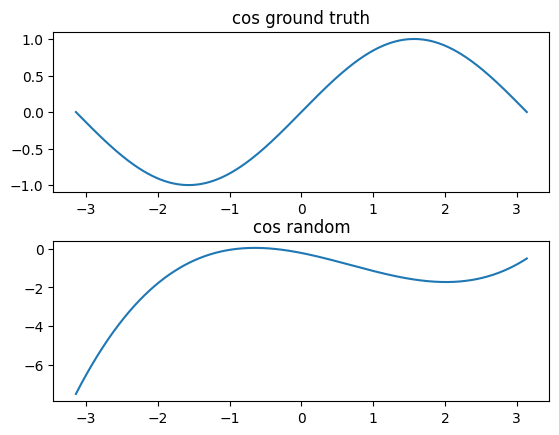

In [3]:
import matplotlib.pyplot as plt

plt.subplot(2, 1, 1)
plt.subplots_adjust(hspace=0.3)
plt.title("cos ground truth")
plt.plot(x, y)

plt.subplot(2, 1, 2)
plt.title("cos random")
plt.plot(x, y_random)

plt.show()

### 3차원 다항식 모델 학습하기

In [4]:
#하이퍼파라미터
learning_rate = 1e-6

#데이터셋
x = torch.linspace(-math.pi, math.pi, 1000)
y = torch.sin(x)

#모델 가중치 초기화
a = torch.randn(())
b = torch.randn(())
c = torch.randn(())
d = torch.randn(())

for epoch in range(2000):
    #순전파
    y_pred = (a * x ** 3) + (b * x ** 2) + (c * x) + d
    
    #오차 계산
    loss = (y_pred - y).pow(2).sum().item()

    #역전파
    grad_y_pred = 2.0 * (y_pred - y)
    grad_a = (grad_y_pred * x ** 3).sum()
    grad_b = (grad_y_pred * x ** 2).sum()
    grad_c = (grad_y_pred * x).sum()
    grad_d = grad_y_pred.sum()

    #가중치 업데이트
    a -= learning_rate * grad_a
    b -= learning_rate * grad_b
    c -= learning_rate * grad_c
    d -= learning_rate * grad_d

    #출력 
    if epoch % 100 == 0:
        print(f'epoch : {epoch}, loss : {loss}')


epoch : 0, loss : 8360.33984375
epoch : 100, loss : 971.43603515625
epoch : 200, loss : 811.9229125976562
epoch : 300, loss : 680.1809692382812
epoch : 400, loss : 570.0179443359375
epoch : 500, loss : 477.8832092285156
epoch : 600, loss : 400.8139343261719
epoch : 700, loss : 336.33648681640625
epoch : 800, loss : 282.3849182128906
epoch : 900, loss : 237.23406982421875
epoch : 1000, loss : 199.44293212890625
epoch : 1100, loss : 167.806640625
epoch : 1200, loss : 141.31942749023438
epoch : 1300, loss : 119.14020538330078
epoch : 1400, loss : 100.56560516357422
epoch : 1500, loss : 85.00784301757812
epoch : 1600, loss : 71.97526550292969
epoch : 1700, loss : 61.05657958984375
epoch : 1800, loss : 51.90776443481445
epoch : 1900, loss : 44.2410774230957


#### 결과 시각화

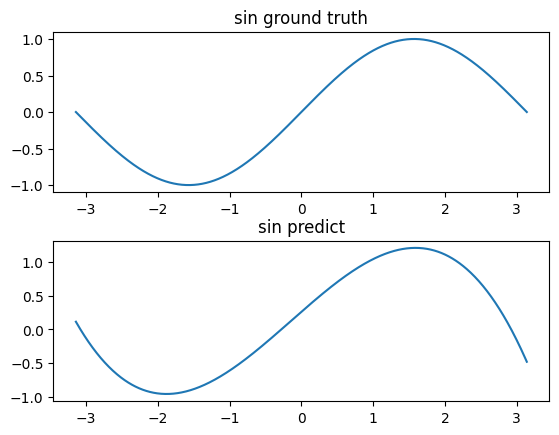

In [5]:
plt.subplot(2, 1, 1)
plt.subplots_adjust(hspace=0.3)
plt.title("sin ground truth")
plt.plot(x, y)

plt.subplot(2, 1, 2)
plt.title("sin predict")
plt.plot(x, y_pred)

#### 자동미분

In [13]:
#하이퍼파라미터
learning_rate = 1e-6

#데이터셋
x = torch.linspace(-math.pi, math.pi, 1000)
y = torch.sin(x)

#모델 가중치 초기화
a = torch.randn((), requires_grad=True)
b = torch.randn((), requires_grad=True)
c = torch.randn((), requires_grad=True)
d = torch.randn((), requires_grad=True)

for epoch in range(2000):
    y_pred = (a * x ** 3) + (b * x ** 2) + (c * x) + d

    loss = (y_pred - y).pow(2).sum()

    loss.backward()

    with torch.no_grad():
        a -= learning_rate * a.grad
        b -= learning_rate * b.grad
        c -= learning_rate * c.grad
        d -= learning_rate * d.grad

        a.grad = None
        b.grad = None
        c.grad = None
        d.grad = None

    if epoch % 100 == 0:
        print(f'epoch : {epoch}, loss : {loss.item()}')

epoch : 0, loss : 117862.9296875
epoch : 100, loss : 792.0740966796875
epoch : 200, loss : 665.3201904296875
epoch : 300, loss : 559.1876831054688
epoch : 400, loss : 470.1312255859375
epoch : 500, loss : 395.39794921875
epoch : 600, loss : 332.6787414550781
epoch : 700, loss : 280.038330078125
epoch : 800, loss : 235.85398864746094
epoch : 900, loss : 198.7647247314453
epoch : 1000, loss : 167.6291046142578
epoch : 1100, loss : 141.48960876464844
epoch : 1200, loss : 119.54308319091797
epoch : 1300, loss : 101.11575317382812
epoch : 1400, loss : 85.64234924316406
epoch : 1500, loss : 72.64860534667969
epoch : 1600, loss : 61.73650360107422
epoch : 1700, loss : 52.572078704833984
epoch : 1800, loss : 44.874977111816406
epoch : 1900, loss : 38.40993881225586


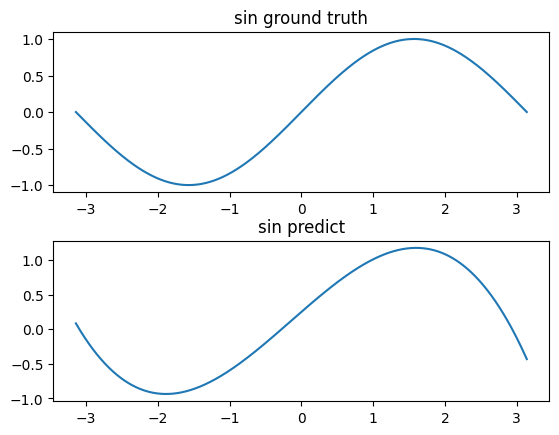

In [15]:
y_pred = y_pred.clone().detach().numpy()

plt.subplot(2, 1, 1)
plt.subplots_adjust(hspace=0.3)
plt.title("sin ground truth")
plt.plot(x, y)

plt.subplot(2, 1, 2)
plt.title("sin predict")
plt.plot(x, y_pred)

### 파이토치 모듈 사용하기

In [21]:
import torch
import torch.nn as nn

class LegendrePolynomial3(nn.Module):
    def __init__(self):
        super().__init__()

        self.a = nn.Parameter(torch.randn(()))
        self.b = nn.Parameter(torch.randn(()))
        self.c = nn.Parameter(torch.randn(()))
        self.d = nn.Parameter(torch.randn(()))

    def forward(self, x):
        return (self.a * x ** 3) + (self.b * x ** 2) + (self.c * x) + self.d

In [23]:
#하이퍼파라미터
learning_rate = 1e-6

#데이터셋
x = torch.linspace(-math.pi, math.pi, 1000)
y = torch.sin(x)

model = LegendrePolynomial3()

for epoch in range(2000):
    y_pred = model(x)

    loss = nn.MSELoss(reduction='sum')(y_pred, y)

    loss.backward()

    with torch.no_grad():
        model.a -= learning_rate * model.a.grad
        model.b -= learning_rate * model.b.grad
        model.c -= learning_rate * model.c.grad
        model.d -= learning_rate * model.d.grad

        model.a.grad = None
        model.b.grad = None
        model.c.grad = None
        model.d.grad = None
    if epoch % 100 == 0:
        print(f'epoch : {epoch}, loss : {loss}')



epoch : 0, loss : 44252.53125
epoch : 100, loss : 1570.0025634765625
epoch : 200, loss : 1274.25439453125
epoch : 300, loss : 1039.157470703125
epoch : 400, loss : 847.6473388671875
epoch : 500, loss : 691.6324462890625
epoch : 600, loss : 564.5258178710938
epoch : 700, loss : 460.96417236328125
epoch : 800, loss : 376.5805358886719
epoch : 900, loss : 307.81866455078125
epoch : 1000, loss : 251.78248596191406
epoch : 1100, loss : 206.11361694335938
epoch : 1200, loss : 168.8912353515625
epoch : 1300, loss : 138.55067443847656
epoch : 1400, loss : 113.81770324707031
epoch : 1500, loss : 93.65423583984375
epoch : 1600, loss : 77.21467590332031
epoch : 1700, loss : 63.81016540527344
epoch : 1800, loss : 52.87924575805664
epoch : 1900, loss : 43.9647216796875


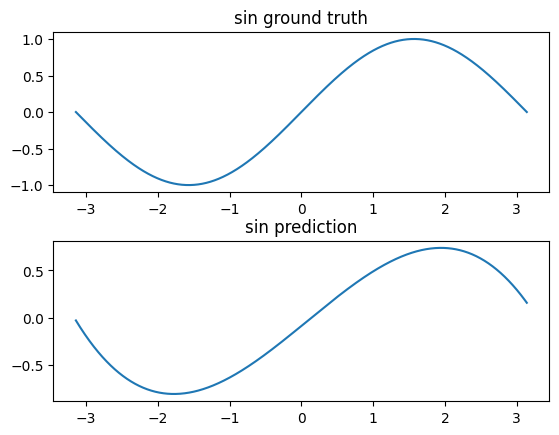

In [25]:
x = x.squeeze()
y_pred = model(x).clone().detach().squeeze().numpy()
y = y.squeeze()

plt.subplot(2, 1, 1)
plt.subplots_adjust(hspace=0.3)
plt.title("sin ground truth")
plt.plot(x, y)

plt.subplot(2, 1, 2)
plt.title("sin prediction")
plt.plot(x, y_pred)

#### 최적화 함수

In [26]:
#하이퍼파라미터
learning_rate = 1e-6

#데이터셋
x = torch.linspace(-math.pi, math.pi, 1000)
y = torch.sin(x)

model = LegendrePolynomial3()

#손실 함수
criterion = nn.MSELoss(reduction='sum')

print(list(model.parameters()))
optimizer = torch.optim.SGD(params=model.parameters(), lr=learning_rate)

for epoch in range(2000):
    optimizer.zero_grad()

    y_pred = model(x)

    loss = criterion(y_pred, y)

    loss.backward()

    optimizer.step()

    if epoch % 100 == 0:
        print(f'epoch : {epoch}, loss : {loss}')

[Parameter containing:
tensor(-0.1244, requires_grad=True), Parameter containing:
tensor(1.0819, requires_grad=True), Parameter containing:
tensor(0.2285, requires_grad=True), Parameter containing:
tensor(2.0972, requires_grad=True)]
epoch : 0, loss : 44454.87890625
epoch : 100, loss : 1463.9598388671875
epoch : 200, loss : 1218.54150390625
epoch : 300, loss : 1022.1580810546875
epoch : 400, loss : 857.6350708007812
epoch : 500, loss : 719.78369140625
epoch : 600, loss : 604.2655029296875
epoch : 700, loss : 507.4520263671875
epoch : 800, loss : 426.30548095703125
epoch : 900, loss : 358.28240966796875
epoch : 1000, loss : 301.2546081542969
epoch : 1100, loss : 253.43983459472656
epoch : 1200, loss : 213.3452911376953
epoch : 1300, loss : 179.7212677001953
epoch : 1400, loss : 151.52108764648438
epoch : 1500, loss : 127.86717224121094
epoch : 1600, loss : 108.02511596679688
epoch : 1700, loss : 91.3790054321289
epoch : 1800, loss : 77.41289520263672
epoch : 1900, loss : 65.694358825683

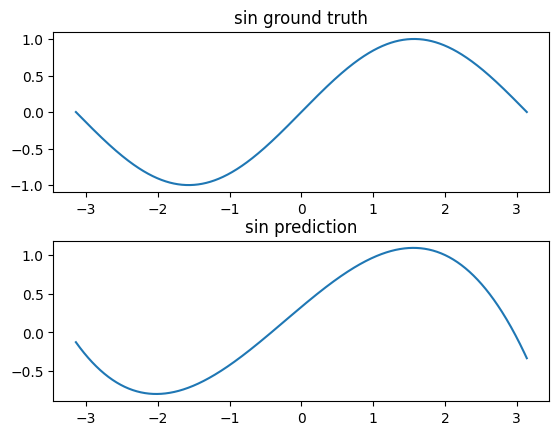

In [27]:
x = x.squeeze()
y_pred = model(x).clone().detach().squeeze().numpy()
y = y.squeeze()

plt.subplot(2, 1, 1)
plt.subplots_adjust(hspace=0.3)
plt.title("sin ground truth")
plt.plot(x, y)

plt.subplot(2, 1, 2)
plt.title("sin prediction")
plt.plot(x, y_pred)